In [1]:
import warnings
import pandas as pd
import utils.plot as custom_plt
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

In [2]:
plt.rc('font', family='GULIM')
warnings.filterwarnings(action='ignore')
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv('Database/rainfall_train.csv', index_col=0)
df_test = pd.read_csv('Database/rainfall_test.csv', index_col=0)

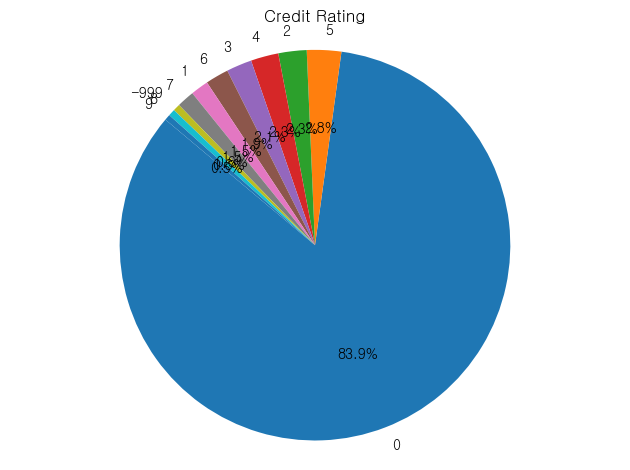

In [4]:
custom_plt.plot_imabalance(df, 'rainfall_train.class_interval')

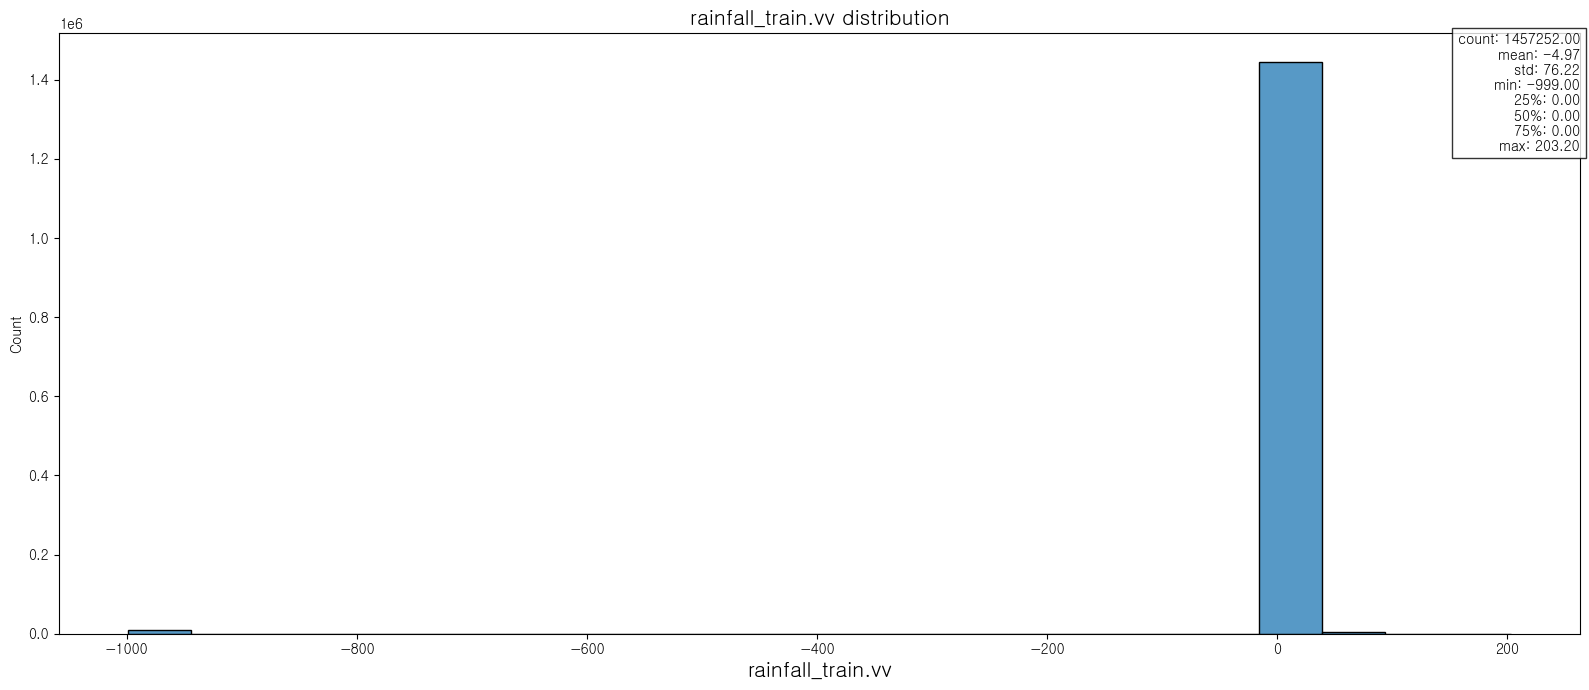

In [7]:
custom_plt.plot_continuous_variable(df, 'rainfall_train.vv', False, False)

In [6]:
df.select_dtypes(include=['number']).columns.tolist()

['rainfall_train.fc_month',
 'rainfall_train.fc_day',
 'rainfall_train.fc_hour',
 'rainfall_train.dh',
 'rainfall_train.ef_month',
 'rainfall_train.ef_day',
 'rainfall_train.ef_hour',
 'rainfall_train.v01',
 'rainfall_train.v02',
 'rainfall_train.v03',
 'rainfall_train.v04',
 'rainfall_train.v05',
 'rainfall_train.v06',
 'rainfall_train.v07',
 'rainfall_train.v08',
 'rainfall_train.v09',
 'rainfall_train.vv',
 'rainfall_train.class_interval']